<a href="https://colab.research.google.com/github/tomonari-masada/course2023-stats2/blob/main/01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# イントロダクション
* **参考書**： キャメロン・デビッドソン=ピロン(著), 玉木徹(訳)『Pythonで体験するベイズ推論:PyMCによるMCMC入門』, 森北出版 (2017)
 * https://www.amazon.co.jp/dp/4627077912
* 今回の授業資料で参考にしたコード（上の和訳の原書の公式リポジトリ）
 * https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb


* 昨年度までと同様、PyMCを使おうと思いましたが・・・
 * https://www.pymc.io/
* NumPyroを使うことにしました。
 * https://num.pyro.ai/

## はじめに
* 「統計モデリング２」の前半は、MCMCによって事後分布からサンプリングをする方法について説明します。
 * 後半は、変分ベイズ法によって事後分布を近似的に求める方法について説明します。
* 上述の参考書には、ベイズ主義と頻度主義の違いについて最初に書いてありますが、ここでは扱いません。

## ベイズ則の復習

### ベイズ則

* $P(A|X)=\frac{P(X|A)P(A)}{P(X)}$
 * 証明には、条件付き確率の定義を使えばよい。

* $P(A|X) \propto P(X|A)P(A)$
 * こういう書き方をすることもある。

### 例題：司書か農業家か？（参考書より）
* スティーブは内向的な性格。彼が司書になりそうだという結論には、多くの人が同意するだろう。
* だが、司書と農業家の比率は1:20で、農業家の方が司書より20倍多い。


* スティーブが司書であるという事象を$A$とする。スティーブについて何の情報もなければ、$P(A)=\frac{1}{21}=0.047$である。
 * これが事前確率。

* 近所の住人から、彼が内向的だとの情報（この情報を$X$とする）を得た。
* この情報が与えられたとき、スティーブが司書である確率は、いくらになるか？
* つまり、考えたいのは$P(A|X)$である。
 * これが事後確率。

* ベイズ則
$$P(A|X)=\frac{P(X|A)P(A)}{P(X)}$$


* $P(X|A)$について
 * $P(X|A)$は、スティーブが司書である場合に近所の住人が彼は内向的だと語る確率。これは非常に高いだろう。
 * そこで、0.95とする。
* $P(X)$について
 * $P(X)=P(X|A)P(A)+P(X|\neg A)P(\neg A)$と分解できる。
 * $P(X|\neg A)$は、スティーブが農業家である場合に近所の人が彼は内向的だと語る確率。0.5だとしよう。
 * すると、
$P(X)=0.95 \times \frac{1}{21} + 0.5 \times \frac{20}{21} = 0.52$を得る。



* 以上より、
$P(A|X) = \frac{0.95 \times \frac{1}{21}}{0.52} = 0.087$という結果を得る。

* 上の計算を、棒グラフにしてみる。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'

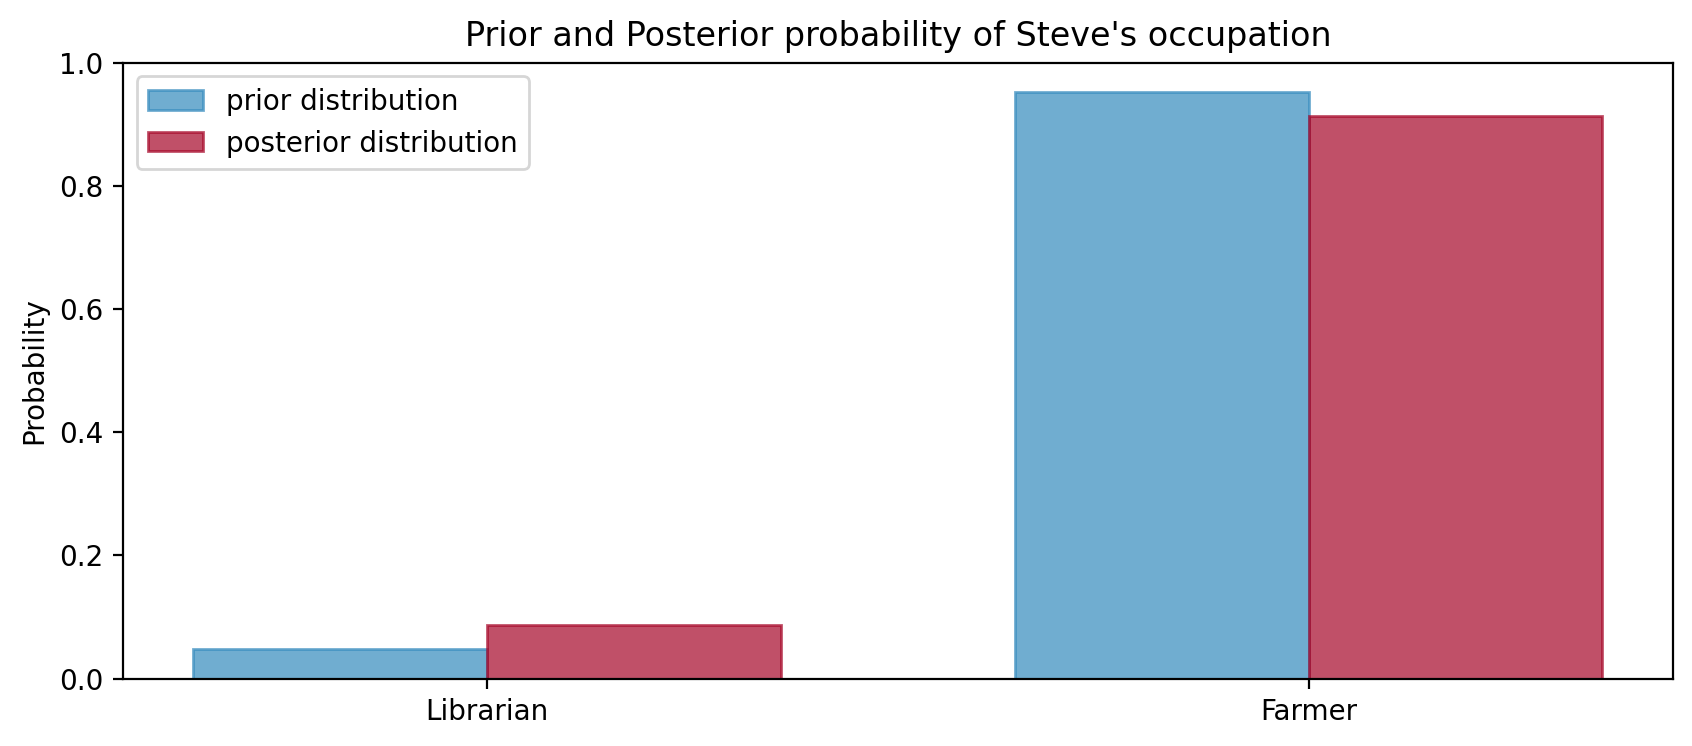

In [2]:
plt.figure(figsize=(10, 4))

colours = ["#348ABD", "#A60628"]

LEFT = 0.0
RIGHT = 0.7
WIDTH = 0.25

prior = [1/21, 20/21]
posterior = [0.087, 1 - 0.087]
plt.bar([LEFT, RIGHT], prior, alpha=0.70, width=WIDTH,
        color=colours[0], label="prior distribution",
        lw=1, edgecolor=colours[0])

plt.bar([LEFT+WIDTH, RIGHT+WIDTH], posterior, alpha=0.7,
        width=WIDTH, color=colours[1],
        label="posterior distribution",
        lw=1, edgecolor=colours[1])

plt.xticks([LEFT+WIDTH/2, RIGHT+WIDTH/2], ["Librarian", "Farmer"])
plt.title("Prior and Posterior probability of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left");

## ベイズ的な統計モデリングにおけるベイズ則の使われ方
* ベイズ的なモデリングでは、$A$は確率分布のパラメータ、$X$は観測されたデータである。
 * $X$はすでに分かっているものである。
 * $A$は我々が直接知ることができないものである。
* 見た目をパラメータっぽくするため、記号として、$A$ではなく$\theta$を使うことにする。
 * パラメータの個数は1つとは限らない。通常は、複数個ある。


### ベイズ的モデリングにおけるベイズ則
$$P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$$
 * $P(\theta)$はモデルのパラメータが従う確率分布で、事前分布(prior distribution)
 * $P(X|\theta)$は観測データの尤度(likelihood)
 * $P(X)$は観測データの周辺尤度(marginal likelihood, evidence)
  * これは、規格化定数になっている。
 * $P(\theta|X)$もモデルのパラメータが従う確率分布だが、これは事後分布(posterior distribution)


### 最尤推定やMAP推定との違い
* 観測データのモデルのパラメータ$\theta$について、それが従う分布を考えるのがベイズ的なモデリングの特徴。
 * つまり、分布の分布を考えるのがベイズ的なモデリングの特徴。
* 最尤推定では、「$P(X|\theta)$を最大にする$\theta$は？」という問題を解くことで答えを一つに決める。
* MAP推定では、「$P(\theta|X)$を最大にする$\theta$は？」という問題を解くことで答えを一つに決める。
* ベイズ的なモデリングでは、$\theta$について、答えとなる値を一つ選ぶのではなく、分布で答える。


* ベイズ的なモデリングでは、特定の観測データ集合$X$が与えられたときに、パラメータ$\theta$が取りうるあらゆる値について、それぞれの値を取ることがどのくらいありえそうかを求める。
 * つまり、事後分布$P(\theta|X)$を求める。

### 例題：「コイン投げ」問題
* 表が出た回数のモデリングには二項分布を使う。
 * これが$P(X|\theta)$に相当する。
* 二項分布のパラメータが従う分布としては、二項分布の共役事前分布であるベータ分布を使う。
 * これが$P(\theta)$に相当する。
* 求めたいのは、観測データが与えられているという条件の下で、表が出る確率が従う分布
 * これが$P(\theta|X)$に相当する。

* 共役事前分布を使う場合は、解析的に事後分布を計算できる。
 * 二項分布にとっては、ベータ分布が共役事前分布。
 * ここでは、解析的に求めた事後分布の密度関数を、単にグラフで描いているだけ。

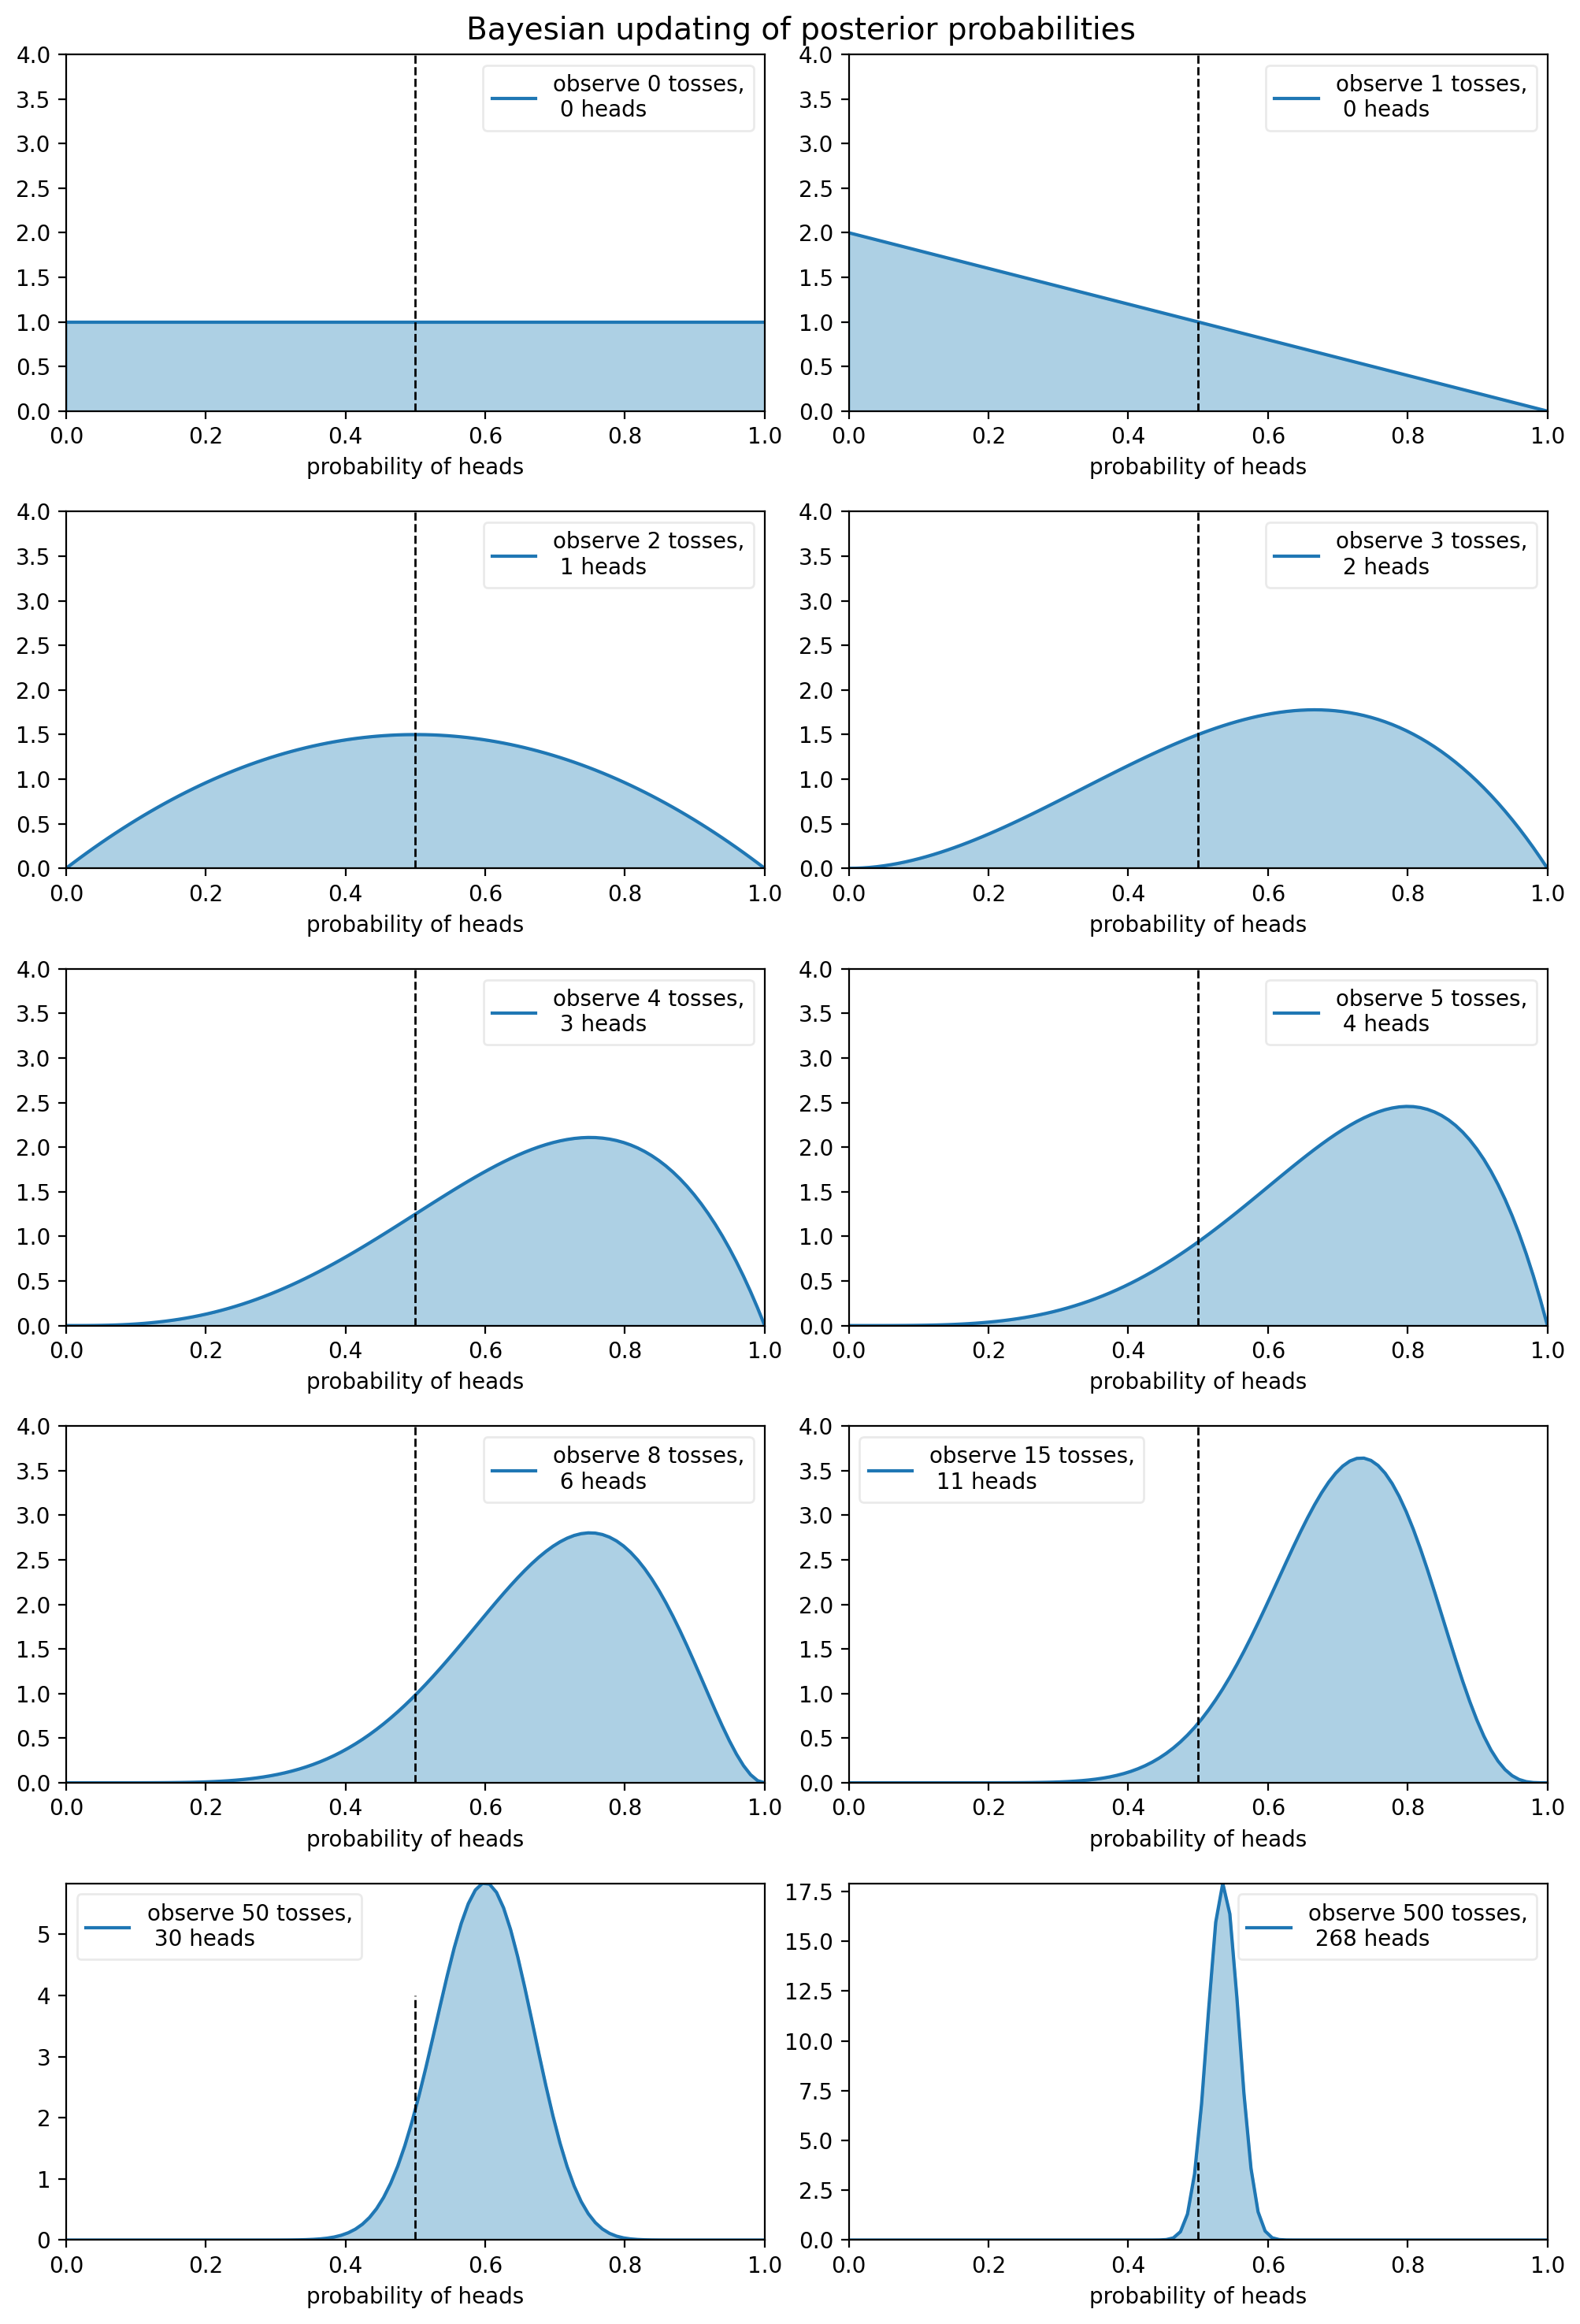

In [3]:
plt.figure(figsize=(10, 15))

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500] # 試行回数

# 観測データを作る（表が出る確率0.5でコインをsize回投げておく）
data = stats.bernoulli.rvs(0.5, size=n_trials[-1]) 

x = np.linspace(0, 1, 100) 

# 二項分布にとって共役な事前分布であるベータ分布を使っている
for k, N in enumerate(n_trials):
  sx = plt.subplot(len(n_trials) // 2, 2, k + 1)
  plt.xlabel("probability of heads")
  # 観測データの最初のN個だけを事後分布のパラメータの計算に反映させる
  heads = data[:N].sum() 
  # ベータ分布の確率密度関数を作る
  y = stats.beta.pdf(x, 1 + heads, 1 + N - heads) 
  # 密度関数の描画
  plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads)) 
  plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
  plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

  leg = plt.legend()
  leg.get_frame().set_alpha(0.4)
  plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities", fontsize=14)
plt.tight_layout();

## MCMCを使うと何ができるのか
$$P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$$
* $P(X)$は、規格化のために必要。

### ベイズ的モデリングで、すでに分かっていること
* 尤度関数$P(X|\theta)$は、我々が決めるものである。
 * データがそれに従うと仮定した分布の、確率質量関数や確率密度関数が分かっていれば、ちゃんと式で書ける。
* 事前分布$P(\theta)$も、我々が決めるものである。
 * 事前分布として使うことに決めた分布の、確率質量関数や確率密度関数が分かっていれば、ちゃんと式で書ける。
* ということは、$P(X|\theta)P(\theta)$の部分がどういう式になるかは、すでに分かっている。

### ベイズ的モデリングで、まだ分かっていないこと
* 周辺尤度$P(X)$は、$P(X) = \int P(X|\theta)P(\theta)d\theta$という等式を満たす。
* だが、ほとんどの場合、$P(X)$を閉じた式で書き下すことはできない。
* ということは、事後分布$P(\theta|X)$の密度関数を閉じた式として書き下すことも、ほとんどの場合、できない。
 * $P(\theta|X)$を求める計算が、$P(X)$で割る、という計算を含むから。
 * 共役事前分布を使う場合は、例外的に、事後分布$P(\theta|X)$の密度関数を閉じた式として書き下せる。


### MCMCを使うと何ができるようになるか
* MCMCを使うと、$P(X)$が計算できなくても、$P(X|\theta)P(\theta)$さえ分かっていれば、$P(\theta|X)$からサンプリングできる。
* 事後分布が$\theta$の何らかの関数$f(\theta)$に比例するということ、つまり$P(\theta|X) \propto f(\theta)
 $ということさえ分かっていればよい。
 * 言い換えれば、事後分布の規格化定数が分かっていなくてもよい。
* そして、$P(X|\theta)P(\theta)$がどういう式になるかは、上述のように、普通はすでに分かっている。

## 様々な確率分布：離散分布
* ベイズ的なデータモデリングを行うためには、様々な確率分布についての知識が必要。
* データに合わせて、また、データをモデル化する分布に合わせて、適切な分布を選ぶ。

### 離散分布とは
* 確率変数$Z$のとる値が離散値の場合に$Z$が従う分布。
* 確率変数$Z$が特定の値をとる確率は、確率質量関数(pmf; probability mass function)によって与えられる。


### ポアソン分布
$$P(Z = k; \lambda) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$
 * 確率変数$Z$がパラメータ$\lambda$のポアソン分布に従うことを、以下のように書く。
$$ Z \sim \text{Poi}(\lambda)$$
 * $Z$の期待値は$\lambda$になる。つまり、
$$\mathbb{E}_{P(Z;\lambda)}[Z] = \sum_{k=0}^\infty \bigg( k \frac{ \lambda^k e^{-\lambda} }{k!} \bigg) = \lambda$$


* ポアソン分布の確率質量関数を棒グラフで描いてみる。

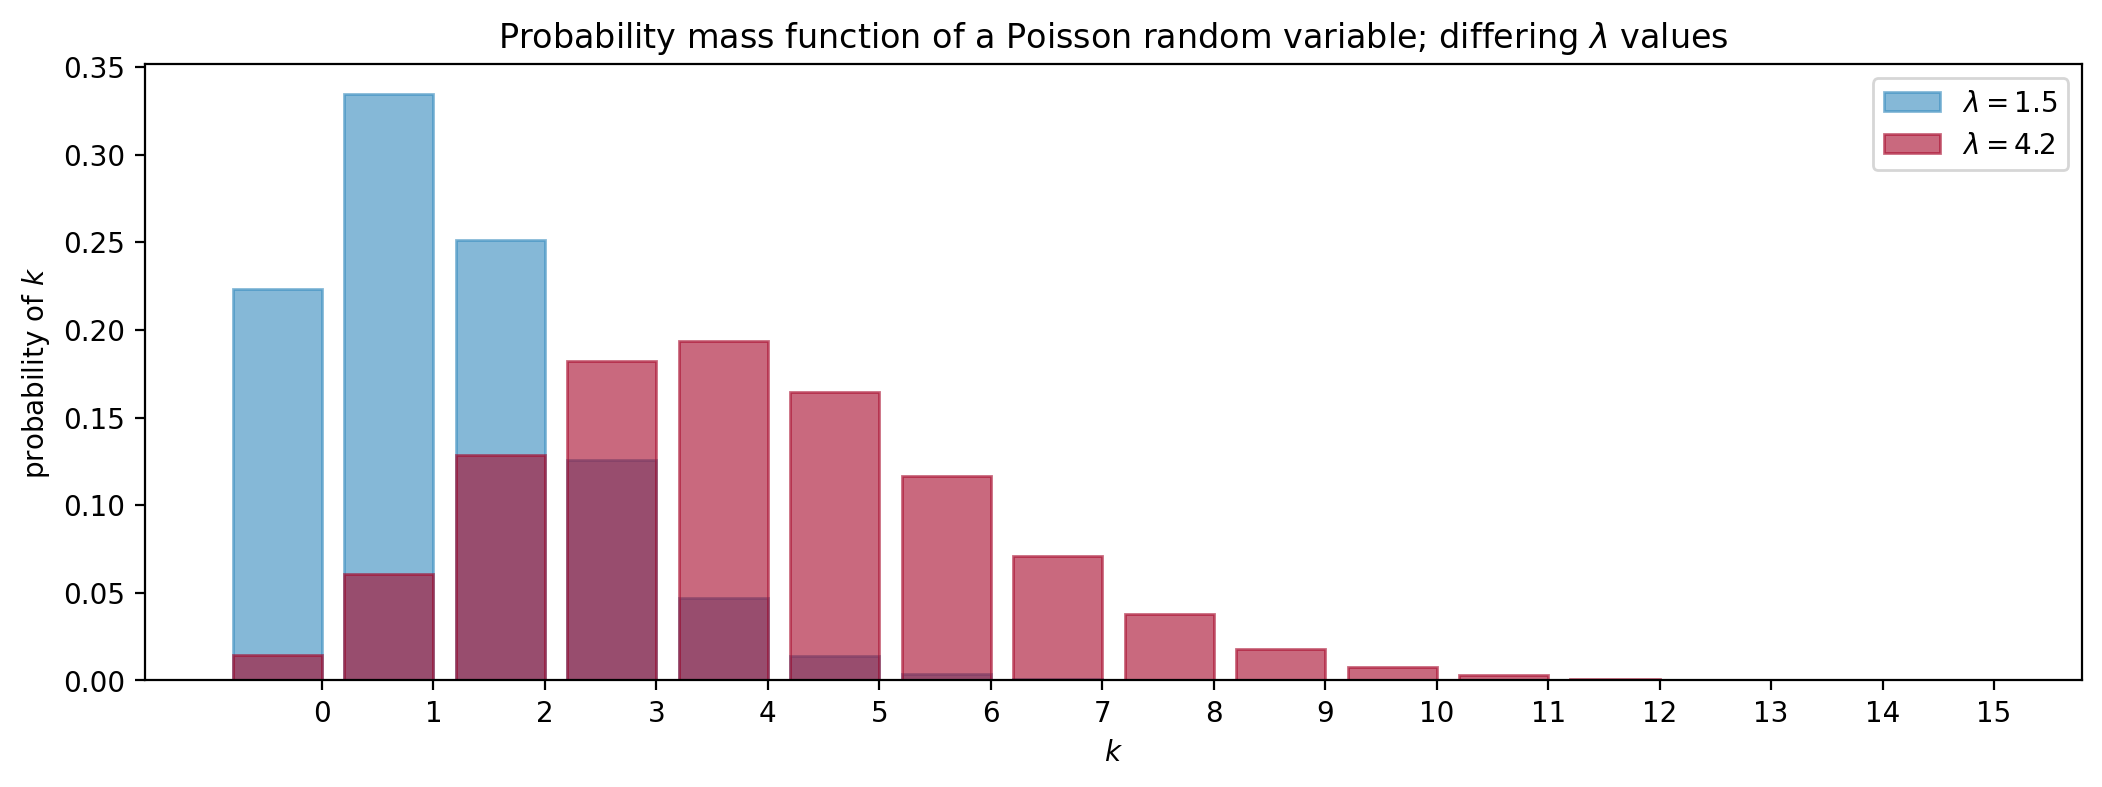

In [4]:
plt.figure(figsize=(12.5, 4))

a = np.arange(16)
poi = stats.poisson # ポアソン分布
lambda_ = [1.5, 4.25] # パラメータλについて2通りの設定を考える
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw=1)

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw=1)

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing $\lambda$ values");

### 連続分布とは
* 確率変数$Z$のとる値が連続値の場合。
* 連続な確率分布は、確率密度関数(pdf; probability density function)で表される。

### 指数分布
$$ f_Z(z; \lambda) = \lambda e^{ - \lambda z}, \; \; z \geq 0$$
 * 確率変数$Z$の特定の実現値$z$について、密度関数の値$f_Z(z|\lambda)$は、$Z=z$となる確率を表すのではないことに注意！
 * $Z$がパラメータ$\lambda$の指数分布に従うことを、以下のように書く。
$$ Z \sim \text{Exp}(\lambda) $$
 * $Z$の期待値は$\frac{1}{\lambda}$となる。つまり、
$$ \mathbb{E}_{f_Z(z;\lambda)}[Z] = \int_0^\infty z \lambda e^{ - \lambda z} dz = \frac{1}{\lambda}$$

* 指数分布の確率密度関数をグラフで描いてみる。

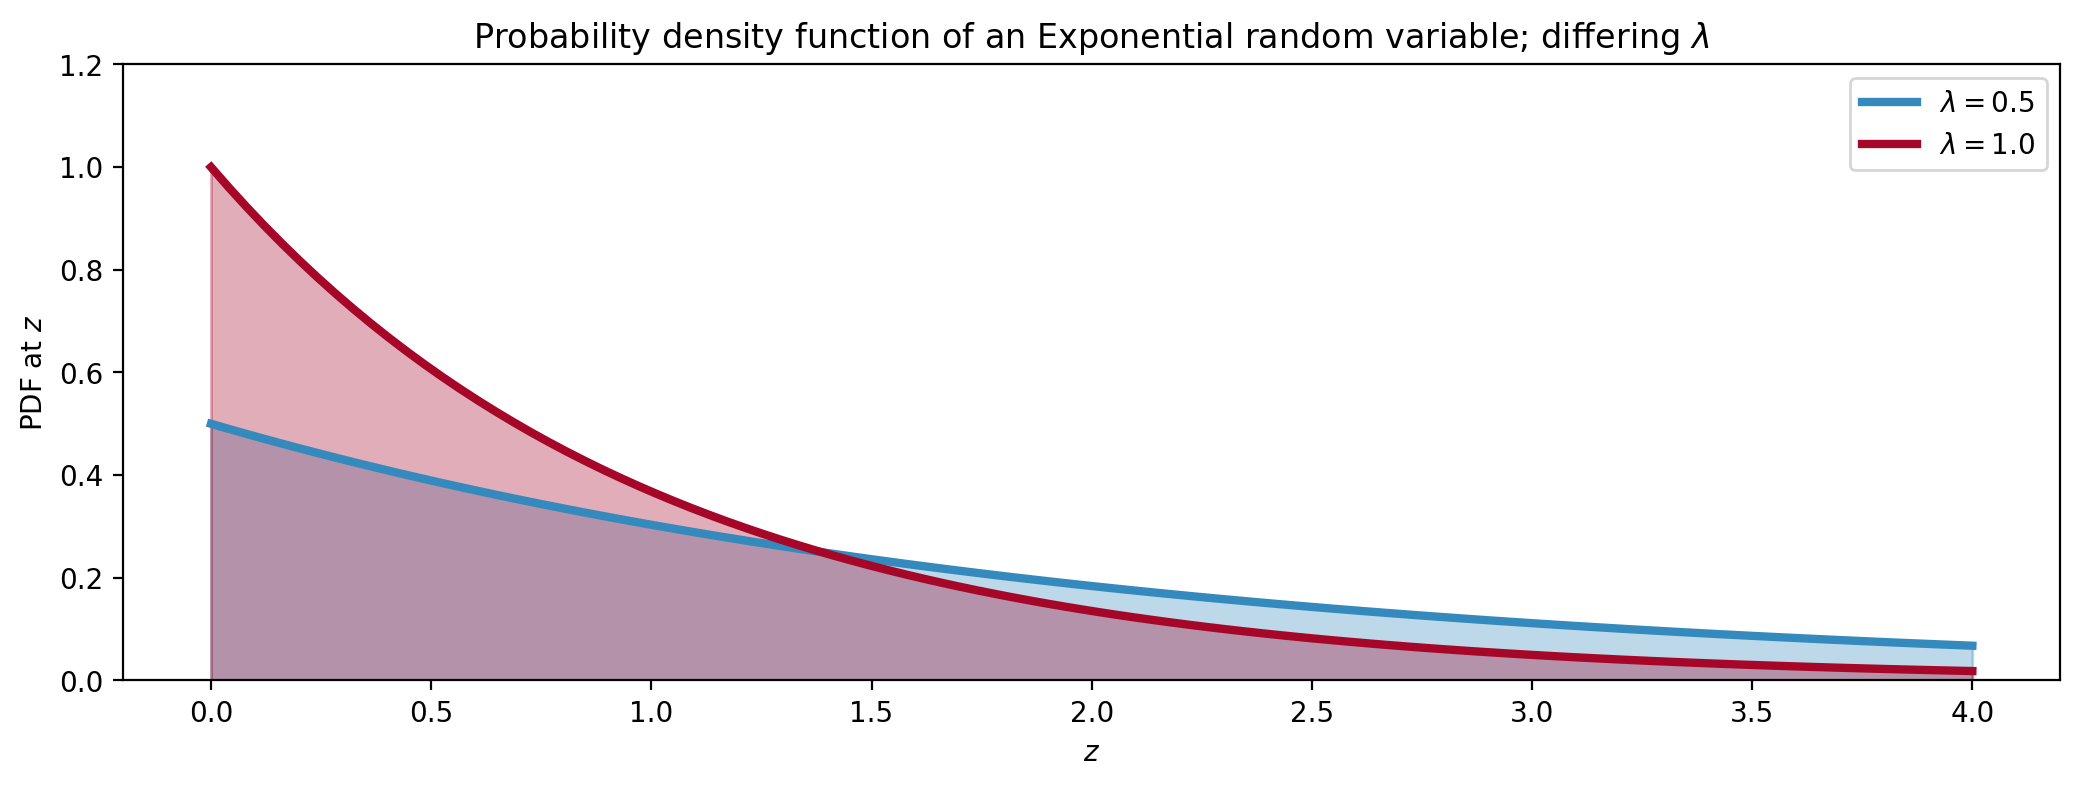

In [5]:
plt.figure(figsize=(12.5, 4))

a = np.linspace(0, 4, 100)
expo = stats.expon # 指数分布
lambda_ = [0.5, 1] # パラメータλについて2通りの設定を考える

for l, c in zip(lambda_, colours):
  scale = 1 / l
  plt.plot(a, expo.pdf(a, scale=scale), lw=3,
           color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=scale), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable; differing $\lambda$");

## 計算機にベイズ推論をさせるには？
* 今回は、天下り式に、MCMCによる事後分布からのサンプリングの例を示す。
 * ですので、今日はよく意味が分からなくてもいいです。
 * 今回のサンプルコードの意味が分かるのは、おそらく数回後になってから。

### 例題：メッセージ数に変化はあるか？（参考書より）
* あるユーザが毎日受信するメッセージ数をモデリングする。
 * 参考書のデータをそのまま使う。
 * 73件の実数値データ。実際には全て整数になっている。

In [6]:
#!wget "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv"

* 知りたいのは、時間が経つにつれて受信数が変化しているかどうか。
* 受信数をどのようにモデリングすれば良いだろうか？

* まずは受信数の変化を可視化する。

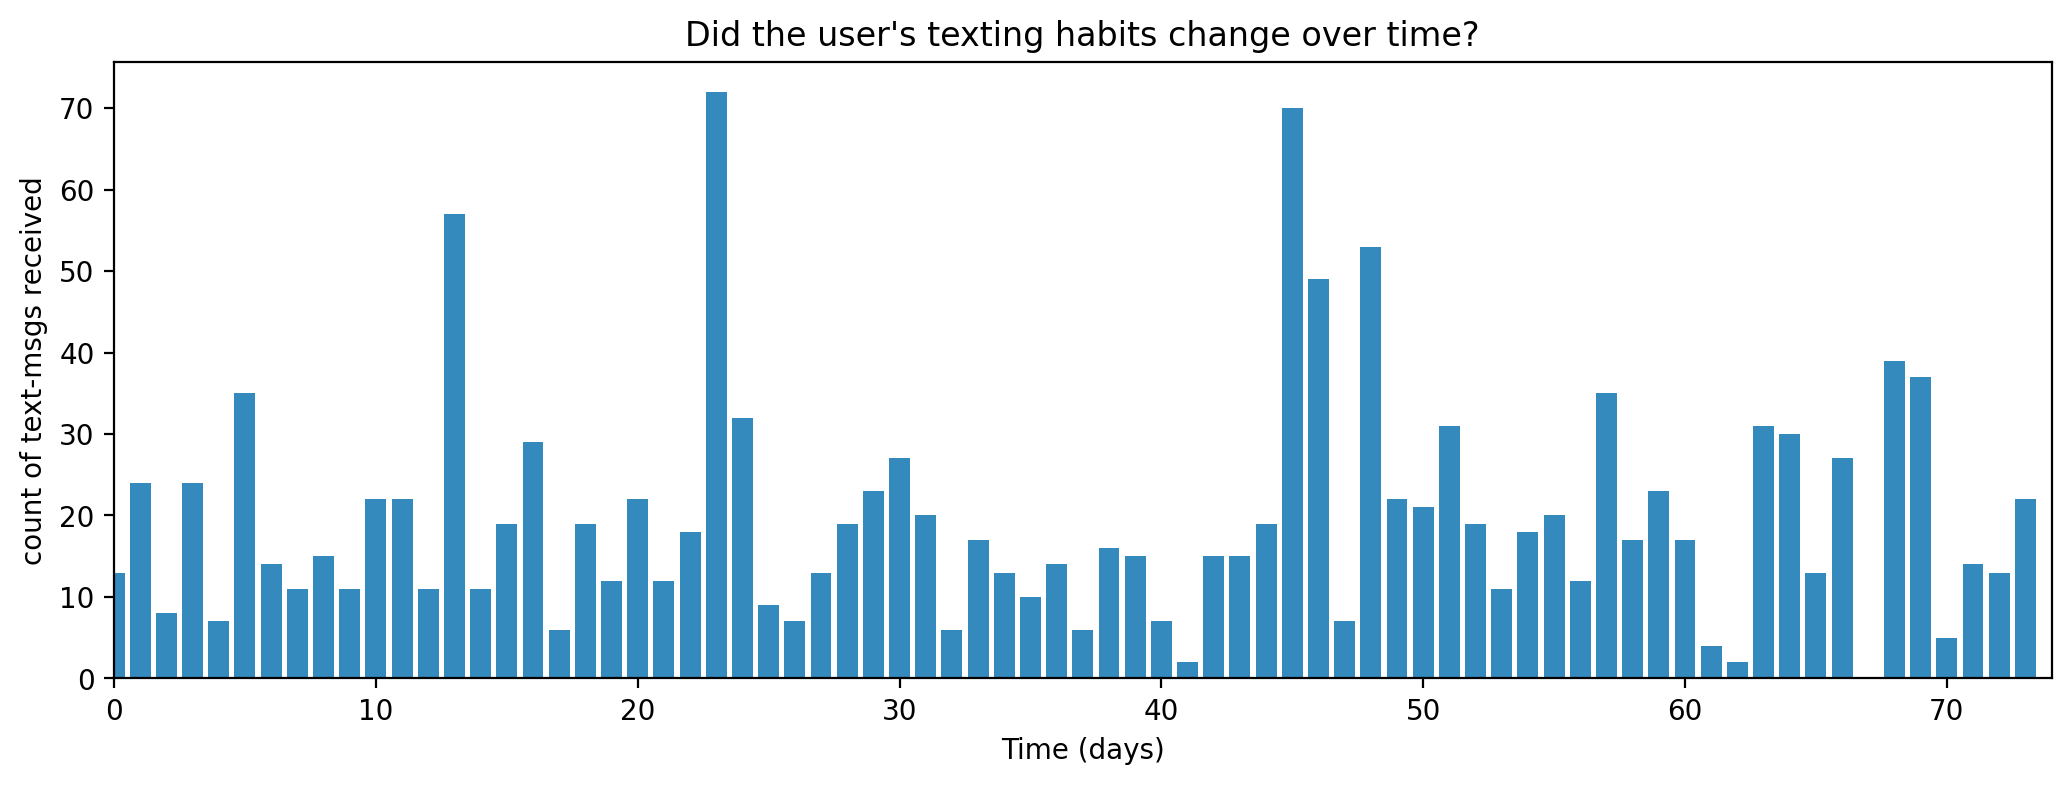

In [7]:
PATH = 'txtdata.csv'

plt.figure(figsize=(12.5, 4))

count_data = np.loadtxt(PATH)
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

* 見た感じ、時間軸の真ん中あたりを境に、後半は受信数が多めに見える。
* そこで、ある変化点$\tau$を境に受信数が異なる分布に従う、と仮定する。
 * $\tau$より前は、パラメータが$\lambda_1$のポアソン分布に従い、
 * $\tau$以後は、パラメータが$\lambda_2$のポアソン分布に従うと仮定する。
$$ X_t \sim \text{Poi}(\lambda_1) \; \; \text{ if $t < \tau$ } $$
$$ X_t \sim \text{Poi}(\lambda_2) \; \; \text{ if $t \geq \tau$ } $$

* $\lambda_1$と$\lambda_2$は、同じ事前分布に従うと仮定する。
 * いずれも、パラメータが$\alpha$の指数分布に従うと仮定する。
$$ \lambda_1 \sim \text{Exp}(\alpha) $$
$$ \lambda_2 \sim \text{Exp}(\alpha) $$


* 境界となる時点$\tau$については、考えている時間軸の範囲のどの位置になるかが等確率であると仮定する。
 * 考えている時間軸の範囲にある時点の個数を$N$とする。
 * $\tau$は、以下の確率質量関数を持つ一様分布に従うと仮定する。
$$ P(\tau = k) = \frac{1}{N} \;\; \text{ for $k = 1,\ldots, N$ } $$

* 以上でデータのモデルは決まった。
* このモデルを「データにフィットさせ」、$\lambda_1$や$\lambda_2$の事後分布や、変化点$\tau$の事後分布を求めるには、どうすればいいか？
 * これを分かるようになるのが、「統計モデリング2」の前半の目標。 
 * ライブラリとしては、NumPyroを使うことにする。

### NumPyro
* ここからの説明は、今日のところは、なんとなく聞くだけで良いです。
* 参考にしたブログ記事
 * https://www.hellocybernetics.tech/entry/2020/09/09/093000

* 可視化ツールArviZのインストール (https://python.arviz.org/)
 * Google Colabでは、"Requirement already satisfied"と出てくるはず。

In [8]:
#!pip install arviz

* NumPyroのインストール

In [9]:
#!pip install numpyro

* NumPyroその他をインポート。
 * GPUは使わないよう、NumPyroを設定する。

In [10]:
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import arviz as az

az.style.use("arviz-darkgrid")
rng_key = random.PRNGKey(0)
numpyro.set_platform("cpu")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


* NumPyroでは、数値計算の部分でJAXを多用する。
 * JAXについては、当面は、「GPUが使えるNumPy」ぐらいの理解でOK。

* NumPyroでは、モデルを関数として定義する。
 * 事前分布$\text{Exp}(\alpha)$の$\alpha$の設定の仕方に注意。
 * 変化点$\tau$より前か後かによって$\lambda_1$か$\lambda_2$が入っている配列を用意している。

In [11]:
def model(data):
  n_data = len(data)

  alpha = 1.0 / data.mean() # 受信数の平均の逆数（なぜこのように設定するかについては参考書を参照）
  lambda_1 = numpyro.sample("lambda_1", dist.Exponential(rate=alpha))
  lambda_2 = numpyro.sample("lambda_2", dist.Exponential(rate=alpha))

  tau = numpyro.sample("tau", dist.Uniform(low=0, high=n_data))

  idx = jnp.arange(n_data) # Index
  with numpyro.plate("data_plate", n_data):
    lambda_ = numpyro.deterministic("lambda_", jnp.where(tau > idx, lambda_1, lambda_2))
  numpyro.sample("obs", dist.Poisson(rate=lambda_), obs=data)

* モデルのレンダリング
 * エラーが出ます。（Google Colabじゃなければ大丈夫？）

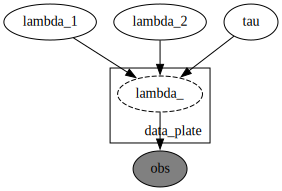

In [12]:
numpyro.render_model(model, model_args=(count_data,))

* デフォルトの設定を使って、事後分布からサンプルを得る。

In [13]:
rng_key, rng_key_ = random.split(rng_key)

kernel = NUTS(model)
sample_kwargs = dict(
    sampler=kernel, num_warmup=1000, num_samples=1000, num_chains=2, chain_method="parallel"
)
mcmc = MCMC(**sample_kwargs)
mcmc.run(rng_key_, data=count_data)

C:\Users\yoshi\AppData\Local\Temp\ipykernel_6008\3165340952.py:7: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(**sample_kwargs)
sample: 100%|██████████| 2000/2000 [00:03<00:00, 617.26it/s, 1023 steps of size 1.95e-03. acc. prob=0.77]


* 事後分布に関する統計量を表示させてみる。

In [14]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  lambda_1     17.13      1.17     17.35     14.90     18.68      7.26      1.20
  lambda_2     21.40      1.47     21.08     19.33     23.50      1.23      2.19
       tau     27.32     16.45     27.86      9.47     45.00      1.00     16.96

Number of divergences: 0


* サンプルをじかに見てみる。

In [15]:
mcmc.get_samples()

{'lambda_': Array([[16.729038, 16.729038, 16.729038, ..., 20.607779, 20.607779,
         20.607779],
        [16.719915, 16.719915, 16.719915, ..., 20.515108, 20.515108,
         20.515108],
        [17.055794, 17.055794, 17.055794, ..., 20.505   , 20.505   ,
         20.505   ],
        ...,
        [17.031128, 17.031128, 17.031128, ..., 22.897488, 22.897488,
         22.897488],
        [16.874744, 16.874744, 16.874744, ..., 23.297615, 23.297615,
         23.297615],
        [17.45249 , 17.45249 , 17.45249 , ..., 22.21497 , 22.21497 ,
         22.21497 ]], dtype=float32),
 'lambda_1': Array([16.729038, 16.719915, 17.055794, ..., 17.031128, 16.874744,
        17.45249 ], dtype=float32),
 'lambda_2': Array([20.607779, 20.515108, 20.505   , ..., 22.897488, 23.297615,
        22.21497 ], dtype=float32),
 'tau': Array([10.809725, 10.876101, 11.126932, ..., 44.250896, 44.02214 ,
        44.558815], dtype=float32)}

* 確率変数`lambda_1`について、最初の5つのサンプルを見てみる。

In [16]:
mcmc.get_samples()["lambda_1"][:5]

Array([16.729038, 16.719915, 17.055794, 16.914154, 16.913057], dtype=float32)

* サンプルをArviZで可視化するため、データのフォーマットを変換する。

In [17]:
idata = az.from_numpyro(mcmc)

In [18]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

* ArviZで、事後分布からのサンプルの様子を見てみる。
 * どのモデルパラメータの事後分布を描画するか、`var_names`で指定している。
 * `arviz.plot_trace()`の使い方については、下記ブログ記事も参照。
 * https://oriolabrilpla.cat/en/blog/posts/2020/plot-trace.html

C:\Users\yoshi\PycharmProjects\Compex_Networks\course2023-stats2\lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


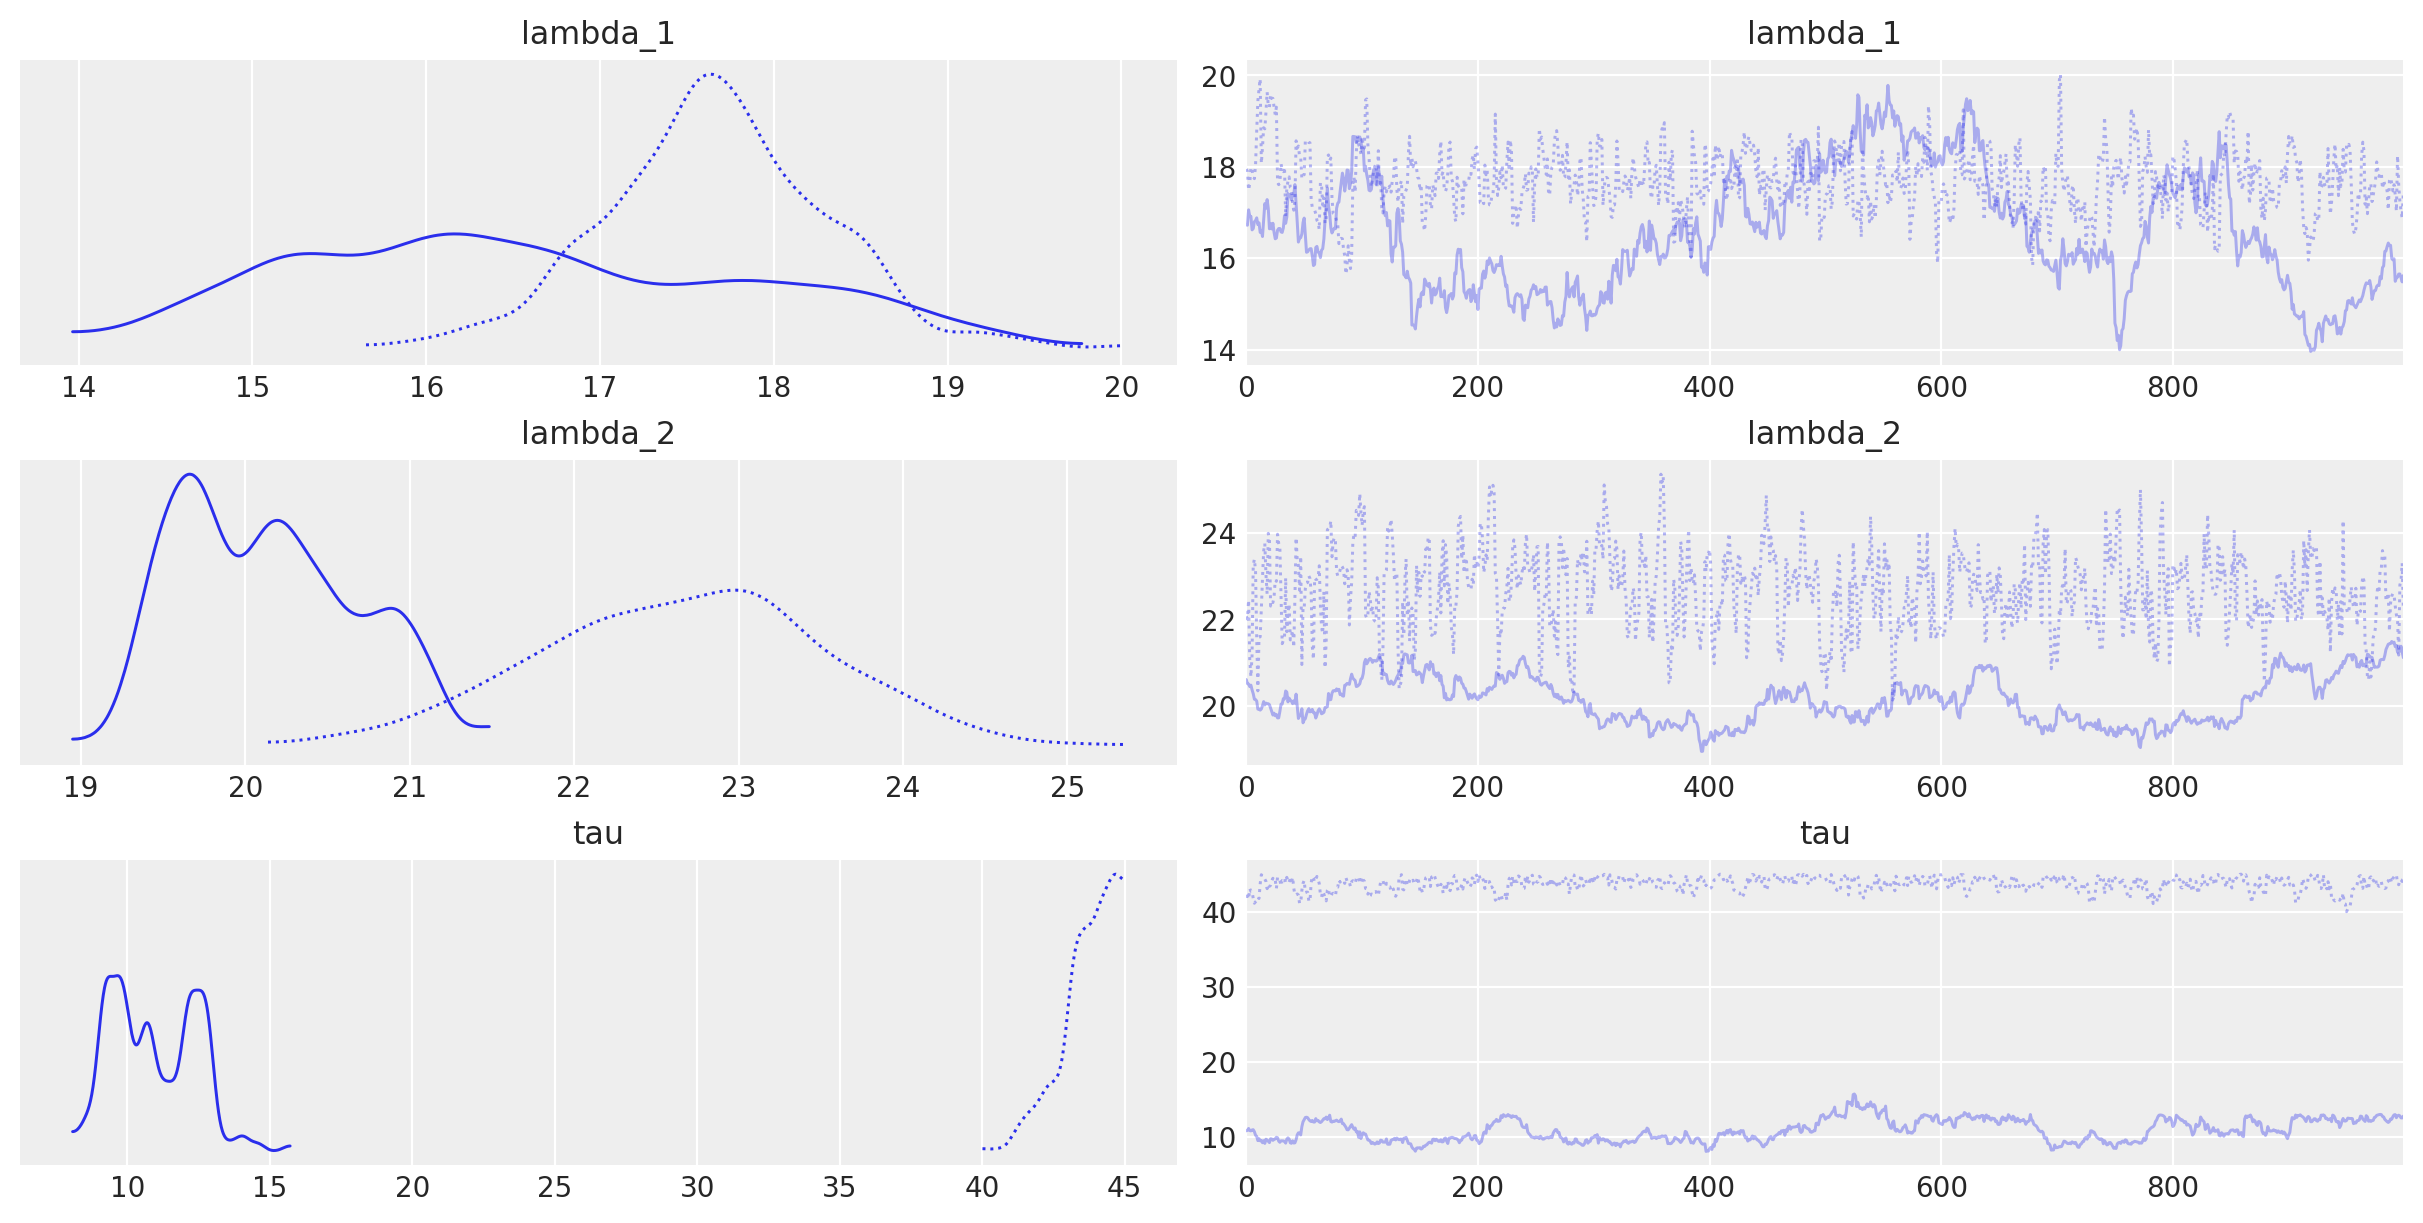

In [19]:
var_names = ["lambda_1", "lambda_2", "tau"]
az.plot_trace(idata, var_names=var_names);

* サンプルの統計量を見てみる。
 * NumPyroの`print_summary()`と、ちょっと違う。

In [20]:
az.summary(idata, var_names=var_names)

C:\Users\yoshi\PycharmProjects\Compex_Networks\course2023-stats2\lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_1,17.126,1.167,14.711,18.965,0.415,0.305,10.0,67.0,1.17
lambda_2,21.399,1.470,19.311,23.842,0.910,0.733,3.0,50.0,1.79
tau,27.324,16.447,9.194,44.983,11.561,9.773,3.0,104.0,1.91


* mcse = Markov Chain standard error
* ess = effective sample size
* これらの概念については、下記を参照。
 * https://mc-stan.org/docs/reference-manual/effective-sample-size.html
 * https://mc-stan.org/posterior/reference/index.html#summarizing-and-diagnosing-draws-objects

* MCMCに関して、分からない言葉が出てきたら、Stanのマニュアルを読むと良いです。
 * https://mc-stan.org/docs/reference-manual/index.html
 * https://mc-stan.org/posterior/reference/index.html

* 以下、ArviZを使わずに、可視化してみる。

* まず、複数あるchainを一つにまとめる。
 * 関数`arviz.extract_dataset`を使う。

In [21]:
stacked = az.extract_dataset(idata)
lambda_1_samples = stacked['lambda_1']
lambda_2_samples = stacked['lambda_2']
tau_samples = stacked['tau']

C:\Users\yoshi\AppData\Local\Temp\ipykernel_6008\708287735.py:1: FutureWarning: extract_dataset has been deprecated, please use extract
  stacked = az.extract_dataset(idata)


* そして、参考書のリポジトリのコードを利用する。
 * https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb

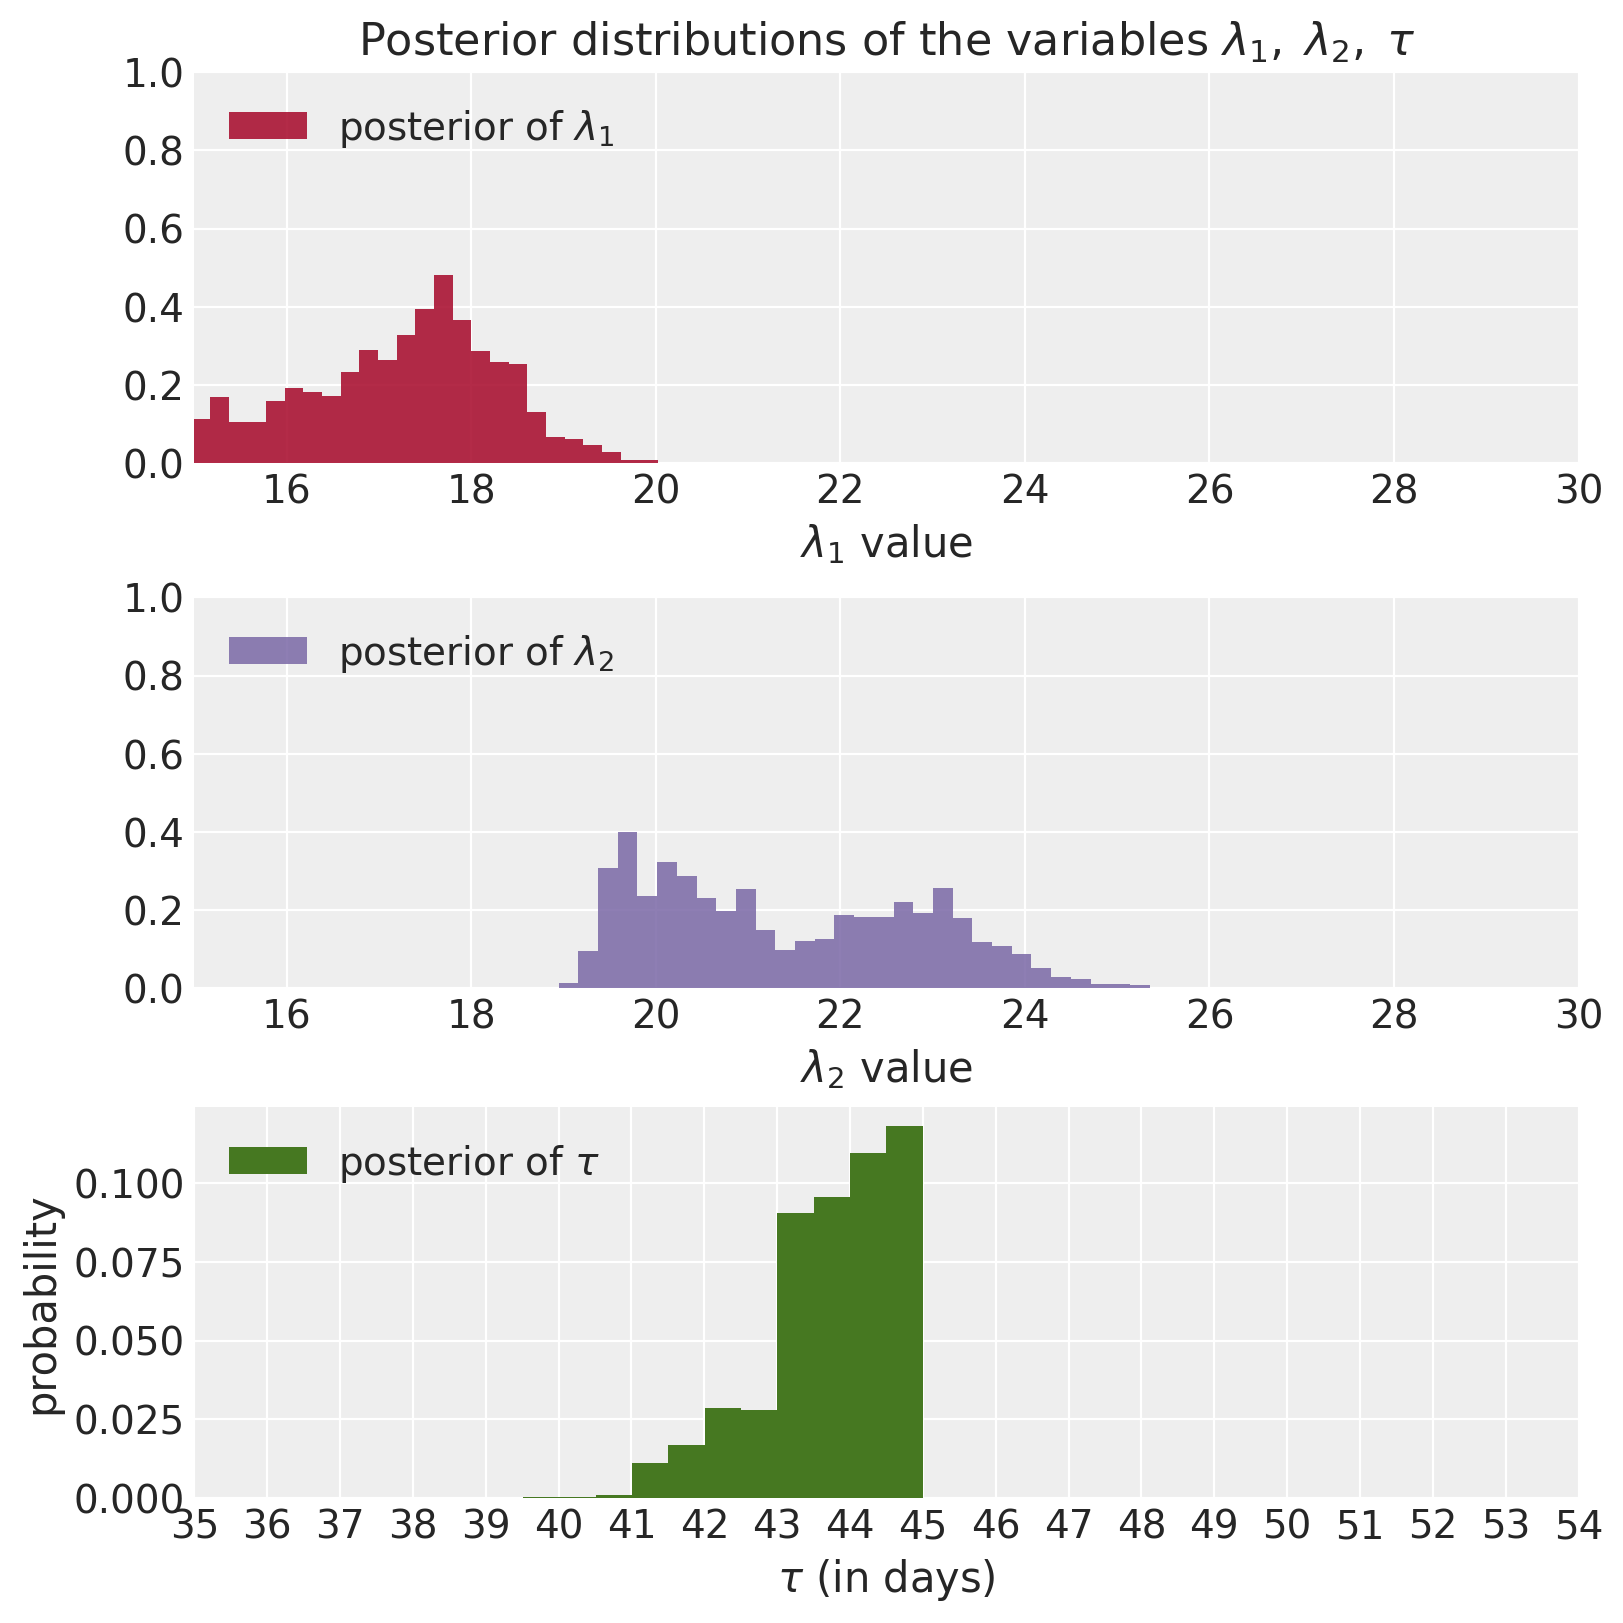

In [22]:
plt.figure(figsize=(8, 8))

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
weights = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=weights, rwidth=2)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

* 変化点を、元の受信数のグラフに重ねて描いてみる。
 * 変化点の前後で、MCMCによって推定された平均受信数が変化しているのがわかる。

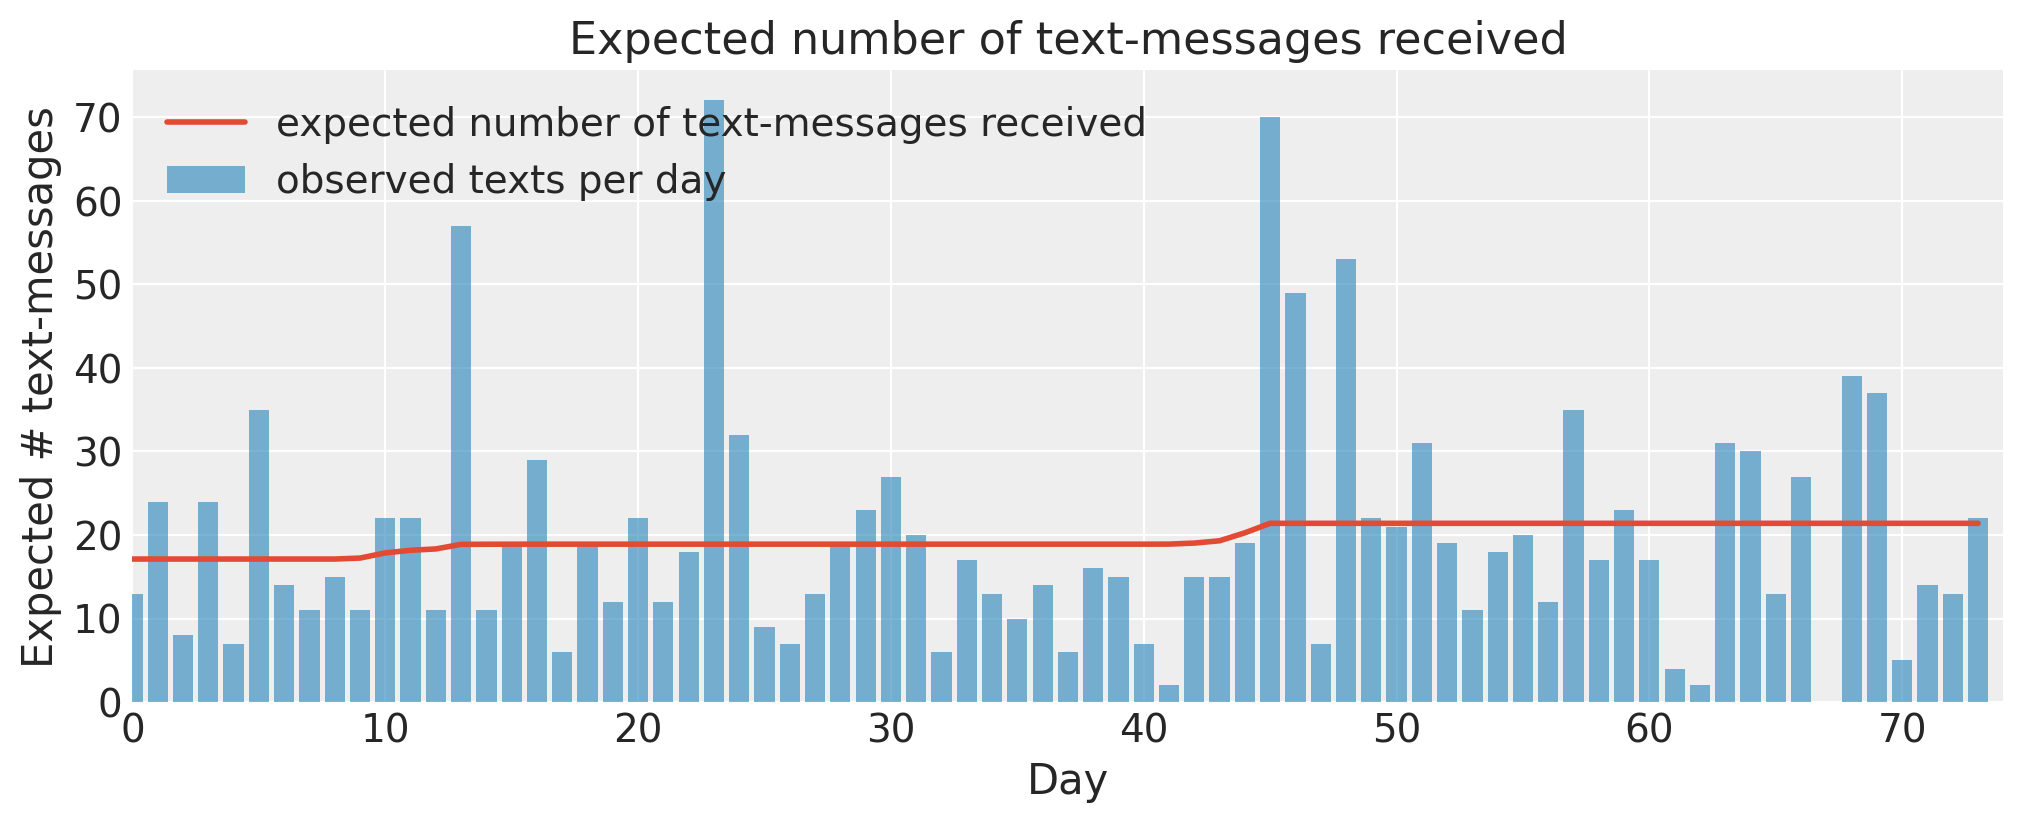

In [23]:
plt.figure(figsize=(10, 4))

# tau_samples, lambda_1_samples, lambda_2_samples は
# それぞれ対応する事後分布からのN個のサンプルを含んでいる。
N = tau_samples.shape[0]

expected_texts_per_day = np.zeros(n_count_data)
for day in range(n_count_data):
  # ix is a bool index of all tau samples corresponding to
  # the switchpoint occurring prior to value of 'day'
  ix = day < tau_samples
  # Each posterior sample corresponds to a value for tau.
  # for each day, that value of tau indicates whether we're "before"
  # (in the lambda1 "regime") or
  #  "after" (in the lambda2 "regime") the switchpoint.
  # by taking the posterior sample of lambda1/2 accordingly, we can average
  # over all samples to get an expected value for lambda on that day.
  # As explained, the "message count" random variable is Poisson distributed,
  # and therefore lambda (the poisson parameter) is the expected value of
  # "message count".
  expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=2, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

## 課題1
* ポアソン分布$\text{Poi}(\lambda)$に従う確率変数の期待値が$\lambda$になることを示せ。
* 指数分布$\text{Exp}(\lambda)$に従う確率変数の期待値が$\frac{1}{\lambda}$になることを示せ。
 * 分からない場合は、ググって調べましょう。
 * 計算問題なので、手書きの紙の写真、またはWordやLaTeXのPDFを提出してください。